# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

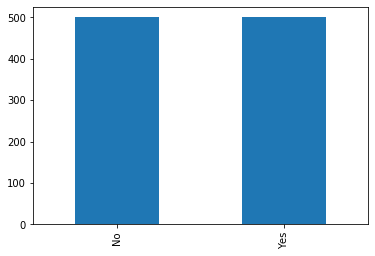

In [2]:
df['left_company'].value_counts().plot.bar()
plt.show()

> The target is completely balanced and we won't have to account for class imbalances.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   left_company                   1000 non-null   object
 1   age                            1000 non-null   int64 
 2   frequency_of_travel            1000 non-null   object
 3   department                     1000 non-null   object
 4   commuting_distance             1000 non-null   int64 
 5   education                      1000 non-null   int64 
 6   satisfaction_with_environment  1000 non-null   int64 
 7   gender                         1000 non-null   object
 8   seniority_level                1000 non-null   int64 
 9   position                       1000 non-null   object
 10  satisfaction_with_job          1000 non-null   int64 
 11  married_or_single              1000 non-null   object
 12  last_raise_pct                 1000 non-null   int64 
 13  last

In [4]:
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [5]:
df.select_dtypes('int64')

,age,commuting_distance,education,satisfaction_with_environment,seniority_level,satisfaction_with_job,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,37,16,4,4,2,3,19,3,9,1,0,0,0
1,39,3,2,3,2,3,15,3,11,10,8,0,7
2,52,25,4,3,4,4,22,4,31,9,8,0,0
3,50,1,3,4,2,3,12,3,19,18,7,0,13
4,44,4,3,4,2,2,12,3,10,5,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39,3,2,4,2,3,18,3,12,1,0,0,0
996,26,4,4,4,2,4,12,3,8,8,7,7,4
997,18,5,3,2,1,2,14,3,0,0,0,0,0
998,28,2,4,1,1,4,13,3,5,3,2,2,2


In [6]:
numerical_vars = df.select_dtypes('int64').columns
categorical_vars = df.select_dtypes('object').columns

categorical_vars = [x for x in categorical_vars if x != 'left_company']

print('Numerical:')
print(*numerical_vars, sep='\n')

print('\nCategorical:')
print(*categorical_vars, sep='\n')

Numerical:
age
commuting_distance
education
satisfaction_with_environment
seniority_level
satisfaction_with_job
last_raise_pct
last_performance_rating
total_years_working
years_at_company
years_in_current_job
years_since_last_promotion
years_with_current_supervisor

Categorical:
frequency_of_travel
department
gender
position
married_or_single


- Integers should be treated as numerical.  
- All categorical except `left_company` should be categorical features.  
- No data with incorrect data types that needed manual correction to the correct type.

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

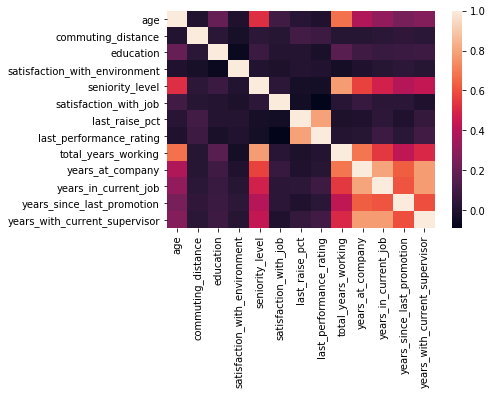

In [7]:
import seaborn as sns

sns.heatmap(df[numerical_vars].corr())
plt.show()

In [8]:
corrs = df[numerical_vars].corr().unstack()
corrs = pd.DataFrame(corrs)
corrs = corrs.reset_index()
corrs.columns = ['var1', 'var2', 'correlation']

corrs.query('var1 != var2 & correlation >= 0.75').sort_values(by='var1')

,var1,var2,correlation
97,last_performance_rating,last_raise_pct,0.792791
85,last_raise_pct,last_performance_rating,0.792791
60,seniority_level,total_years_working,0.779351
108,total_years_working,seniority_level,0.779351
127,years_at_company,years_in_current_job,0.801423
129,years_at_company,years_with_current_supervisor,0.781147
139,years_in_current_job,years_at_company,0.801423
142,years_in_current_job,years_with_current_supervisor,0.781647
165,years_with_current_supervisor,years_at_company,0.781147
166,years_with_current_supervisor,years_in_current_job,0.781647


- `last_performance_rating` and `last_raise_pct` are highly correlated and makes intuitive sense. Will drop one of those.  
- `seniority_level` and `total_years_working` are highly correlated.  Total years may have richer info and will try to use that field.  
- `years_at_company` and `years_in_current_job`, `years_with_current_supervisor` are highly correlated and we use only `years_at_company`. 

In [9]:
nums_to_drop = ['last_raise_pct', 'seniority_level', 'years_in_current_job', 'years_with_current_supervisor']

numerical_vars = [x for x in numerical_vars if x not in nums_to_drop]

print(*numerical_vars, sep='\n')

age
commuting_distance
education
satisfaction_with_environment
satisfaction_with_job
last_performance_rating
total_years_working
years_at_company
years_since_last_promotion


# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [10]:
from sklearn.model_selection import train_test_split

X = df[numerical_vars + categorical_vars]
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=124)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Training samples: 800
Test samples: 200

Features:
age
commuting_distance
education
satisfaction_with_environment
satisfaction_with_job
last_performance_rating
total_years_working
years_at_company
years_since_last_promotion
frequency_of_travel
department
gender
position
married_or_single


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

num_pipe = Pipeline([('impute', SimpleImputer(strategy='median')),('scale', StandardScaler())])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(drop='first'))])

In [12]:
num_pipe.fit_transform(X_train[numerical_vars]).shape

(800, 9)

In [13]:
num_pipe.fit_transform(X_train[numerical_vars])[0,:]

array([-0.08443347, -0.33873757,  0.12174871,  0.32237142,  0.33259888,
        2.31283513,  0.85269911,  0.24623625, -0.34561971])

In [14]:
cat_pipe.fit_transform(X_train[categorical_vars]).shape

(800, 15)

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

proc_pipe = ColumnTransformer(transformers=[
    ('nums', num_pipe, numerical_vars), ('cats', cat_pipe, categorical_vars)
    ])

proc_pipe.fit_transform(X_train).shape

(800, 24)

In [16]:
model_pipe = Pipeline([('processing', proc_pipe), ('glm', LogisticRegression())])
model_pipe = model_pipe.fit(X_train, y_train)

training_acc = model_pipe.score(X_train, y_train)
test_acc = model_pipe.score(X_test, y_test)

print(f'Training accuracy: {training_acc:.2%}')
print(f'Test accuracy: {test_acc:.2%}')

Training accuracy: 70.75%
Test accuracy: 65.50%


Training and test accuracy are relatively close, though seems to be a slight amount of overfitting (65% vs 70% accuracy). We could try regularization to see if that helps.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

- Try regularize models to reduce the modest amount of overfitting.  
- See if there is more data available.  
- Try different preprocessing routines. 